In [16]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [17]:
import matplotlib.pyplot as plt
import pdb
import numpy as np

from polyphase import makegridnd

In [18]:
grid = np.asarray(makegridnd(30, 2)).T

In [19]:
M = np.array([1,1])
chisp = 3
CHI = np.array([[0,chisp],[chisp,0]])

(array([1, 1]),
 array([[0, 3],
        [3, 0]]))

In [20]:
energy = []
def flory_huggins(x, M,CHI,beta=1e-4):
    T1 = 0
    for i,xi in enumerate(x):
        T1 += (xi*np.log(xi))/M[i] + beta/xi
    T2 = 0.5*np.matmul((np.matmul(x,CHI)),np.transpose(x)) 
    
    return T1+T2

for point in grid:
    energy.append(flory_huggins(point, M,CHI,beta=1e-8))

# TODOS

* Concave up should have negative definite Hessian (i.e. a maximum) which is not the case with the curve above

In [21]:
# Convex Hull based method to find binodal curve
from scipy.spatial import ConvexHull
points = np.concatenate((grid[:,1].reshape(-1,1),np.asarray(energy).reshape(-1,1)),axis=1)
hull = ConvexHull(points)

[[1.e-08 1.e+00]
 [1.e+00 1.e-08]]


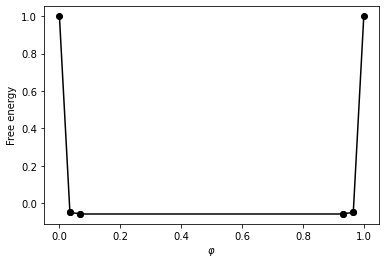

In [22]:
#plt.plot(points[:,0], points[:,1], 'o')
for simplex in hull.simplices:
    if np.sum(np.isclose(grid[simplex].tolist(),0.0,atol=1e-4))==2:
        print(grid[simplex])
        continue
    plt.plot(points[simplex, 0], points[simplex, 1], 'ko-')
plt.xlabel(r'$\varphi$')
plt.ylabel('Free energy')
plt.show()